In [53]:
import keras

In [54]:
keras.backend.backend()

'tensorflow'

In [55]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    plt.show()
    fig.canvas.draw()

In [57]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [58]:
x_train.shape

(60000, 28, 28)

In [59]:
x_test.shape

(10000, 28, 28)

In [60]:
y_train.shape

(60000,)

In [61]:
y_test.shape

(10000,)

In [62]:
#converting 28*28 to 784
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1] *x_train.shape[2])
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [63]:
x_train.shape

(60000, 784)

In [64]:
x_test.shape

(10000, 784)

In [65]:
print(x_train[123]) #some data point

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  38 113 113 113 114 238 253 253 253 255 206  88   

In [66]:
#normalize
#two ways
#1

import sys
!{sys.executable} -m pip install sklearn

from sklearn.preprocessing import normalize
#x1=normalize(x_train[:,np.newaxis], axis=0)

In [67]:
x_train = x_train/255
x_test = x_test/255

In [68]:
print(y_train[0])

y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)  # dont run many times this will agian divieds the class labels
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [71]:
#https://keras.io/getting-started/sequential-model-guide/
#softmax ding here
from keras.models import Sequential
from keras.layers import Activation,Dense

In [73]:
output_dim = 10
input_dim = x_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [77]:
model=Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax')) #putting imput_dim as extra cause dense accepts only one parameter


In [86]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
resluts = model.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test)) 
#it resturn a history datatype

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 250us/step - loss: 1.2736 - acc: 0.6982 - val_loss: 0.8051 - val_acc: 0.8322
Epoch 2/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.7135 - acc: 0.8403 - val_loss: 0.6040 - val_acc: 0.8603
Epoch 3/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.5860 - acc: 0.8584 - val_loss: 0.5231 - val_acc: 0.8729
Epoch 4/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.5246 - acc: 0.8682 - val_loss: 0.4782 - val_acc: 0.8794
Epoch 5/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.4872 - acc: 0.8750 - val_loss: 0.4486 - val_acc: 0.8835
Epoch 6/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.4614 - acc: 0.8794 - val_loss: 0.4273 - val_acc: 0.8885
Epoch 7/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.4423 - acc: 0.8829 - val_loss: 0.

In [83]:
score = model.evaluate(x_test, y_test, verbose=1) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 3s 252us/step
Test score: 0.33564870997071267
Test accuracy: 0.9075


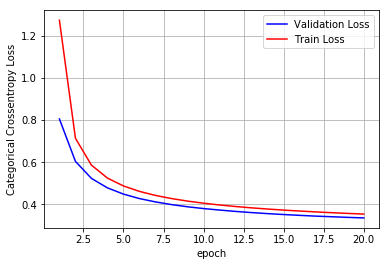

In [85]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))

vy = resluts.history['val_loss']
ty = resluts.history['loss']
plt_dynamic(x, vy, ty, ax)

# mlp+sigmoidactivation+sgdoptimizer

In [87]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_dim=input_dim))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________



    Mean Squared Error: mean_squared_error, MSE or mse
    Mean Absolute Error: mean_absolute_error, MAE, mae
    Mean Absolute Percentage Error: mean_absolute_percentage_error, MAPE, mape
    Cosine Proximity: cosine_proximity, cosine


In [90]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy','mse', 'mae', 'mape', 'cosine'])

In [91]:
resluts=model_sigmoid.fit(x_train,y_train,batch_size=batch_size,epochs=20,validation_data=(x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 168s 3ms/step - loss: 2.2756 - acc: 0.2126 - mean_squared_error: 0.0894 - mean_absolute_error: 0.1793 - mean_absolute_percentage_error: 89658455.4496 - cosine_proximity: -0.3254 - val_loss: 2.2319 - val_acc: 0.4088 - val_mean_squared_error: 0.0885 - val_mean_absolute_error: 0.1784 - val_mean_absolute_percentage_error: 89214183.7696 - val_cosine_proximity: -0.3400
Epoch 2/20
60000/60000 [==============================] - 149s 2ms/step - loss: 2.1897 - acc: 0.4437 - mean_squared_error: 0.0875 - mean_absolute_error: 0.1774 - mean_absolute_percentage_error: 88719920.0469 - cosine_proximity: -0.3548 - val_loss: 2.1367 - val_acc: 0.5595 - val_mean_squared_error: 0.0863 - val_mean_absolute_error: 0.1761 - val_mean_absolute_percentage_error: 88072009.3184 - val_cosine_proximity: -0.3739
Epoch 3/20
60000/60000 [==============================] - 165s 3ms/step - loss: 2.0781 - acc: 0.5749 -

In [97]:
score = model_sigmoid.evaluate(x_test, y_test, verbose=1) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 6s 631us/step
Test score: 0.4597442167043686
Test accuracy: 0.879


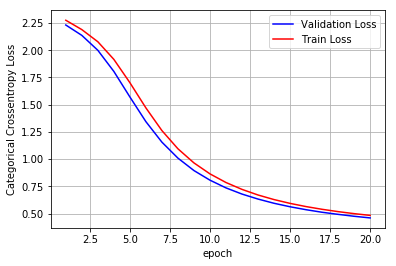

In [98]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))

vy = resluts.history['val_loss']
ty = resluts.history['loss']
plt_dynamic(x, vy, ty, ax)

# mlp+relu+he_intializer+adamoptimizer

In [102]:

#using henormalization also here
model_relu=Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer="he_normal"))
model_relu.add(Dense(128, activation='relu', kernel_initializer="he_normal") )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [103]:
model_relu.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [105]:
results=model_relu.fit(x_train,y_train,batch_size=batch_size,epochs=20,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 41s 680us/step - loss: 0.0167 - acc: 0.9941 - val_loss: 0.0828 - val_acc: 0.9793
Epoch 2/20
60000/60000 [==============================] - 41s 689us/step - loss: 0.0101 - acc: 0.9967 - val_loss: 0.0822 - val_acc: 0.9793
Epoch 3/20
60000/60000 [==============================] - 40s 670us/step - loss: 0.0105 - acc: 0.9968 - val_loss: 0.0830 - val_acc: 0.9799
Epoch 4/20
60000/60000 [==============================] - 41s 691us/step - loss: 0.0100 - acc: 0.9968 - val_loss: 0.0713 - val_acc: 0.9829
Epoch 5/20
60000/60000 [==============================] - 41s 690us/step - loss: 0.0112 - acc: 0.9963 - val_loss: 0.0799 - val_acc: 0.9816
Epoch 6/20
60000/60000 [==============================] - 44s 731us/step - loss: 0.0082 - acc: 0.9971 - val_loss: 0.0886 - val_acc: 0.9804
Epoch 7/20
60000/60000 [==============================] - 44s 726us/step - loss: 0.0106 - acc: 0.9966 - val_loss: 0.

In [106]:
score = model_relu.evaluate(x_test, y_test, verbose=1) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 5s 550us/step
Test score: 0.09576116777540901
Test accuracy: 0.9822


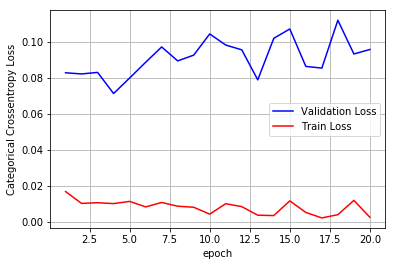

In [107]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))

vy = results.history['val_loss']
ty = results.history['loss']
plt_dynamic(x, vy, ty, ax)

# mlp+batch_normalization+relu+adam

In [108]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer="he_normal"))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer="he_normal") )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_14 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [113]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

results = model_batch.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 56s 940us/step - loss: 0.1818 - acc: 0.9455 - val_loss: 0.0975 - val_acc: 0.9694
Epoch 2/20
60000/60000 [==============================] - 50s 831us/step - loss: 0.0699 - acc: 0.9790 - val_loss: 0.0828 - val_acc: 0.9753
Epoch 3/20
60000/60000 [==============================] - 46s 769us/step - loss: 0.0458 - acc: 0.9857 - val_loss: 0.0682 - val_acc: 0.9782
Epoch 4/20
60000/60000 [==============================] - 48s 796us/step - loss: 0.0337 - acc: 0.9895 - val_loss: 0.0713 - val_acc: 0.9774
Epoch 5/20
60000/60000 [==============================] - 52s 871us/step - loss: 0.0249 - acc: 0.9922 - val_loss: 0.0817 - val_acc: 0.9752
Epoch 6/20
60000/60000 [==============================] - 48s 794us/step - loss: 0.0213 - acc: 0.9930 - val_loss: 0.0782 - val_acc: 0.9785
Epoch 7/20
60000/60000 [==============================] - 52s 860us/step - loss: 0.0207 - acc: 0.9930 - val_loss: 0.

In [115]:
score = model_batch.evaluate(x_test, y_test, verbose=1) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 7s 727us/step
Test score: 0.07812557466479848
Test accuracy: 0.9824


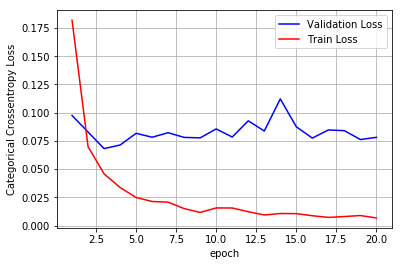

In [116]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))

vy = results.history['val_loss']
ty = results.history['loss']
plt_dynamic(x, vy, ty, ax)

# mlp+relu+dropout+batch_normalization+adam

In [117]:
from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer="he_normal"))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer="he_normal") )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total para

In [118]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
results= model_drop.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 325us/step - loss: 0.4245 - acc: 0.8709 - val_loss: 0.1443 - val_acc: 0.9559
Epoch 2/20
60000/60000 [==============================] - 16s 265us/step - loss: 0.2049 - acc: 0.9387 - val_loss: 0.1087 - val_acc: 0.9662
Epoch 3/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.1554 - acc: 0.9518 - val_loss: 0.0988 - val_acc: 0.9674
Epoch 4/20
60000/60000 [==============================] - 17s 275us/step - loss: 0.1397 - acc: 0.9582 - val_loss: 0.0791 - val_acc: 0.9744
Epoch 5/20
60000/60000 [==============================] - 17s 288us/step - loss: 0.1213 - acc: 0.9620 - val_loss: 0.0699 - val_acc: 0.9774
Epoch 6/20
60000/60000 [==============================] - 21s 354us/step - loss: 0.1088 - acc: 0.9668 - val_loss: 0.0719 - val_acc: 0.9782
Epoch 7/20
60000/60000 [==============================] - 17s 282us/step - loss: 0.0956 - acc: 0.9708 - val_loss: 0.

In [120]:
score = model_drop.evaluate(x_test, y_test, verbose=1) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 146us/step
Test score: 0.05703787430896773
Test accuracy: 0.9833


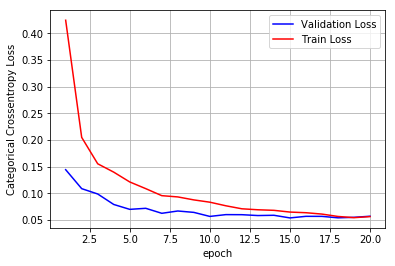

In [121]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))

vy = results.history['val_loss']
ty = results.history['loss']
plt_dynamic(x, vy, ty, ax)

# hyperparameter tuning using gridsearchcv

In [124]:
from keras.optimizers import Adam,RMSprop,SGD
#we can do tuning on any parameter 
#https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
#the above link has many types of tuning like optimizers,epochs,initializers,activation_functions etc
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [125]:
activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)


grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)

In [126]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.978717 using {'activ': 'relu'}
0.975600 (0.001314) with: {'activ': 'sigmoid'}
0.978717 (0.001968) with: {'activ': 'relu'}


# tuning on all

In [133]:
def best_hyperparameters(activ,optimiz,initiali,drop_rate):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=initiali))
    model.add(Dropout(drop_rate))
    model.add(Dense(128, activation=activ, kernel_initializer=initiali) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimiz)
    
    return model

In [ ]:
activ = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
initializers = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ,initiali=initializers,optimiz=optimizer,drop_rate=dropout_rate)



grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
import pandas as pd
df=pd.DataFrame(grid_result.cv_results_)